In [33]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

In [34]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

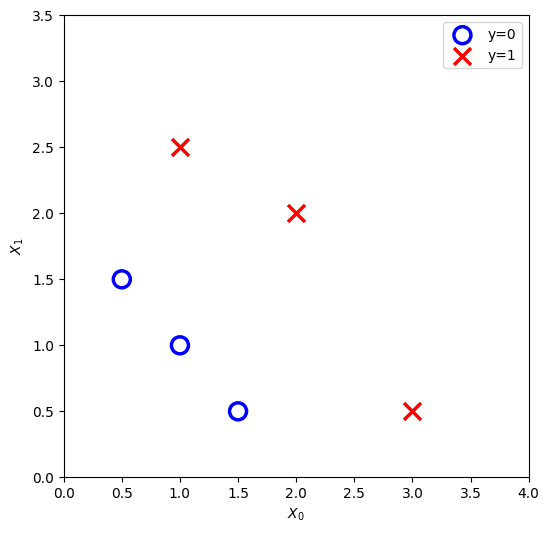

In [35]:
# Separate points based on class labels
pos = y_train == 1
neg = y_train == 0

# Plotting
plt.figure(figsize=(6,6))
plt.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', edgecolors='b', facecolors='none', s=150, label="y=0", linewidths=2.5)
plt.scatter(X_train[pos, 0], X_train[pos, 1], marker='x', color='r', s=150, label="y=1", linewidths=2.5)

# Labels and legend
plt.xlabel("$X_0$")
plt.ylabel("$X_1$")
plt.legend()
plt.xlim(0, 4)
plt.ylim(0, 3.5)
plt.grid(False)

# Show plot
plt.show()

## Formula for Sigmoid function
The formula for a sigmoid function is as follows -  

$g(z) = \frac{1}{1+e^{-z}}\tag{1}$

In [36]:
def sigmoid(z):

    g = 1/(1+np.exp(-z))

    return g

## Cost function

The cost function is defined as:
$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{2}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{3}$$
    
*  where m is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{4} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{5} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{6}
\end{align}
$$

In [37]:
def compute_cost(X, y, w, b):

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)

    cost = cost / m

    return cost

The gradient is defined as:
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{7} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{8}
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target


In [38]:
def compute_gradient(X, y, w, b):
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar

    return dj_db, dj_dw

Gradient Descent is defined as:

$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{9}  \; & \text{for j := 0..n-1} \\
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

In [39]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( compute_cost(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w, b, J_history         #return final w,b and J history for graphing


In [40]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870457   
Iteration 2000: Cost 0.08460064176930078   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.04290759421682   
Iteration 5000: Cost 0.03433847729884557   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879306   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


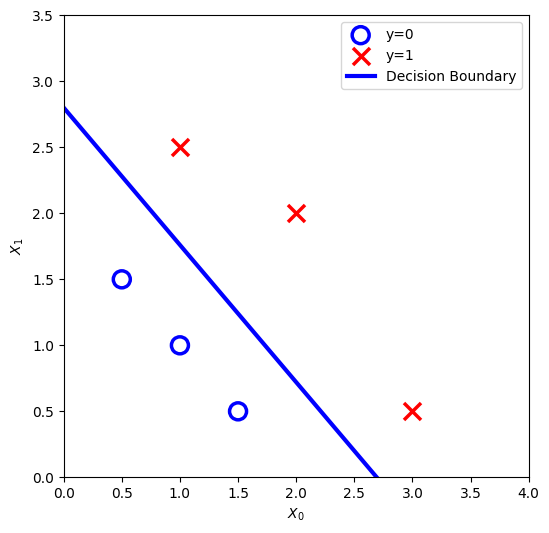

In [41]:
# Extract learned parameters
w0, w1 = w_out  # Unpacking the weights
b = b_out

# Generate x values (spanning the dataset range)
x0_vals = np.linspace(0, 4, 100)
x1_vals = - (w0 * x0_vals + b) / w1  # Compute x1 using decision boundary equation

# Plot data points
plt.figure(figsize=(6,6))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], marker='o', edgecolors='b', facecolors='none', s=150, label="y=0", linewidths=2.5)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], marker='x', color='r', s=150, label="y=1", linewidths=2.5)

# Plot thick blue decision boundary
plt.plot(x0_vals, x1_vals, color='blue', linewidth=3, linestyle='-', label="Decision Boundary")

# Labels and legend
plt.xlabel("$X_0$")
plt.ylabel("$X_1$")
plt.legend()
plt.xlim(0, 4)
plt.ylim(0, 3.5)
plt.grid(False)
plt.show()
